<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ams182/blob/main/Reto%20pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests, zipfile
from io import BytesIO

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder

from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns

from sklearn import tree
import pydotplus 
from IPython.display import Image
from sklearn.datasets import load_iris

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, plot_roc_curve, roc_auc_score, RocCurveDisplay, roc_curve
from sklearn import metrics
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve

from sklearn.dummy import DummyClassifier


import pprint
pd.set_option('display.max_columns', None)


In [2]:
# Cargando bases simplificadas
#directorio = 'C:/Users/AMUNGUIA/Desktop/pia/actividades/bases/Base agua reto/'

# Para regresión, solo numericas con valores de -1 unidad y 1=v 2=a 3 =r
url = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-ams182/main/agua_numericas.csv'
df_numerico = pd.read_csv(url,encoding='latin-1',sep=",")
# # Para clasificación, solo categóricas  y 1=v 2=a 3 =r
url = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-ams182/main/agua_categoricas.csv'
df_categorico = pd.read_csv(url,encoding='latin-1',sep=",") # Para clasificación

# Seleccionando el DF de análisis
df = df_categorico

# acotando el análisis a estado, esto puede cambiarse dependiento el marco de experimentación:
df.drop(['SITIO', 'ORGANISMO_DE_CUENCA', 'MUNICIPIO', 'ACUIFERO', 'LONGITUD', 'LATITUD'], axis=1, inplace = True)

#Variavles 
Y = df['SEMAFORO']
X = df.drop('SEMAFORO',axis=1)
#al ser todas categoricas, se complementa con la moda en caso de tener NAN's
for col in X.columns:
    X[col].fillna(value = X[col].mode()[0],inplace = True)
#Tasformando a categórico
X = pd.get_dummies(X)
    
# Validando Nan y nulls
print('Las indepentiendes tienen valores NULL: ' + str(X.isnull().values.any()) + '\n'
      'Las indepentiendes tienen valores Nan: ' + str(X.isna().values.any())+ '\n') 

print('La dependiente  tiene valores NULL: ' + str(Y.isnull().values.any()) + '\n'
      'La dependiente  tiene valores Nan: ' + str(Y.isna().values.any())+ '\n')

#diviendo los datos
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=1)
print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')


Las indepentiendes tienen valores NULL: False
Las indepentiendes tienen valores Nan: False

La dependiente  tiene valores NULL: False
La dependiente  tiene valores Nan: False

(854, 122) : dimensión de datos de entrada para entrenamiento y validación
(214, 122) : dimensión de datos de entrada para prueba
(854,) : dimensión de variable de salida para entrenamiento y validación
(214,) : dimensión de variable de salida para prueba


In [3]:
Xtv.describe()

,ESTADO_AGUASCALIENTES,ESTADO_BAJA CALIFORNIA,ESTADO_BAJA CALIFORNIA SUR,ESTADO_CAMPECHE,ESTADO_CHIAPAS,ESTADO_CHIHUAHUA,ESTADO_COAHUILA DE ZARAGOZA,ESTADO_COLIMA,ESTADO_DISTRITO FEDERAL,ESTADO_DURANGO,ESTADO_GUANAJUATO,ESTADO_GUERRERO,ESTADO_HIDALGO,ESTADO_JALISCO,ESTADO_MEXICO,ESTADO_MICHOACAN DE OCAMPO,ESTADO_MORELOS,ESTADO_NAYARIT,ESTADO_NUEVO LEON,ESTADO_OAXACA,ESTADO_PUEBLA,ESTADO_QUERETARO ARTEAGA,ESTADO_QUINTANA ROO,ESTADO_SAN LUIS POTOSI,ESTADO_SINALOA,ESTADO_SONORA,ESTADO_TABASCO,ESTADO_TAMAULIPAS,ESTADO_TLAXCALA,ESTADO_VERACRUZ DE IGNACIO DE LA LLAVE,ESTADO_YUCATAN,ESTADO_ZACATECAS,SUBTIPO_BOMBEO CENOTE,SUBTIPO_CENOTE,SUBTIPO_DESCARGA,SUBTIPO_MANANTIAL,SUBTIPO_NORIA,SUBTIPO_POZO,SUBTIPO_POZO NORIA,SUBTIPO_Pozo,CALIDAD_ALC_Alta,CALIDAD_ALC_Baja,CALIDAD_ALC_Indeseable como FAAP,CALIDAD_ALC_Media,CALIDAD_CONDUC_Buena para riego,CALIDAD_CONDUC_Dudosa para riego,CALIDAD_CONDUC_Excelente para riego,CALIDAD_CONDUC_Indeseable para riego,CALIDAD_CONDUC_Permisible para riego,CALIDAD_SDT_ra_Cultivos con manejo especial,CALIDAD_SDT_ra_Cultivos sensibles,CALIDAD_SDT_ra_Cultivos tolerantes,CALIDAD_SDT_ra_Excelente para riego,CALIDAD_SDT_ra_Indeseable para riego,CALIDAD_SDT_salin_Ligeramente salobres,CALIDAD_SDT_salin_Potable - Dulce,CALIDAD_SDT_salin_Salinas,CALIDAD_SDT_salin_Salobres,CALIDAD_FLUO_Alta,CALIDAD_FLUO_Baja,CALIDAD_FLUO_Media,CALIDAD_FLUO_Potable - Optima,CALIDAD_DUR_Muy dura e indeseable usos industrial y domestico,CALIDAD_DUR_Potable - Dura,CALIDAD_DUR_Potable - Moderadamente suave,CALIDAD_DUR_Potable - Suave,CALIDAD_COLI_FEC_Aceptable,CALIDAD_COLI_FEC_Buena calidad,CALIDAD_COLI_FEC_Contaminada,CALIDAD_COLI_FEC_Fuertemente contaminada,CALIDAD_COLI_FEC_Potable - Excelente,CALIDAD_N_NO3_No apta como FAAP,CALIDAD_N_NO3_Potable - Buena calidad,CALIDAD_N_NO3_Potable - Excelente,CALIDAD_AS_Apta como FAAP,CALIDAD_AS_No apta como FAAP,CALIDAD_AS_Potable - Excelente,CALIDAD_CD_No apta como FAAP,CALIDAD_CD_Potable - Excelente,CALIDAD_CR_No apta como FAAP,CALIDAD_CR_Potable - Excelente,CALIDAD_HG_No apta como FAAP,CALIDAD_HG_Potable - Excelente,CALIDAD_PB_No apta como FAAP,CALIDAD_PB_Potable - Excelente,CALIDAD_MN_Potable - Excelente,CALIDAD_MN_Puede afectar la salud,CALIDAD_MN_Sin efectos en la salud - Puede dar color al agua,CALIDAD_FE_Potable - Excelente,CALIDAD_FE_Sin efectos en la salud - Puede dar color al agua,CONTAMINANTES_NO,CONTAMINANTES_SI,CUMPLE_CON_ALC_NO,CUMPLE_CON_ALC_SI,CUMPLE_CON_COND_NO,CUMPLE_CON_COND_SI,CUMPLE_CON_SDT_ra_NO,CUMPLE_CON_SDT_ra_SI,CUMPLE_CON_SDT_salin_NO,CUMPLE_CON_SDT_salin_SI,CUMPLE_CON_FLUO_NO,CUMPLE_CON_FLUO_SI,CUMPLE_CON_DUR_NO,CUMPLE_CON_DUR_SI,CUMPLE_CON_CF_NO,CUMPLE_CON_CF_SI,CUMPLE_CON_NO3_NO,CUMPLE_CON_NO3_SI,CUMPLE_CON_AS_NO,CUMPLE_CON_AS_SI,CUMPLE_CON_CD_NO,CUMPLE_CON_CD_SI,CUMPLE_CON_CR_NO,CUMPLE_CON_CR_SI,CUMPLE_CON_HG_NO,CUMPLE_CON_HG_SI,CUMPLE_CON_PB_NO,CUMPLE_CON_PB_SI,CUMPLE_CON_MN_NO,CUMPLE_CON_MN_SI,CUMPLE_CON_FE_NO,CUMPLE_CON_FE_SI
count,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.00000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.00000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.00000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,8

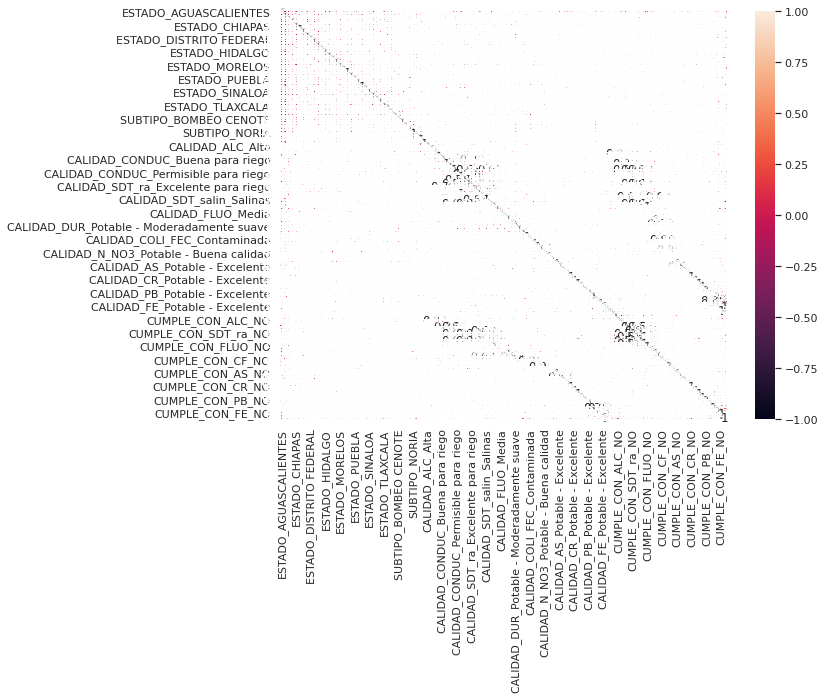

In [4]:
Xtv.corr()

sns.set(rc = {'figure.figsize':(10,7.5)})
sns.heatmap(Xtv.corr(), vmin = -1, vmax = 1,  annot= True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff080a2f850>,
      dtype=object)

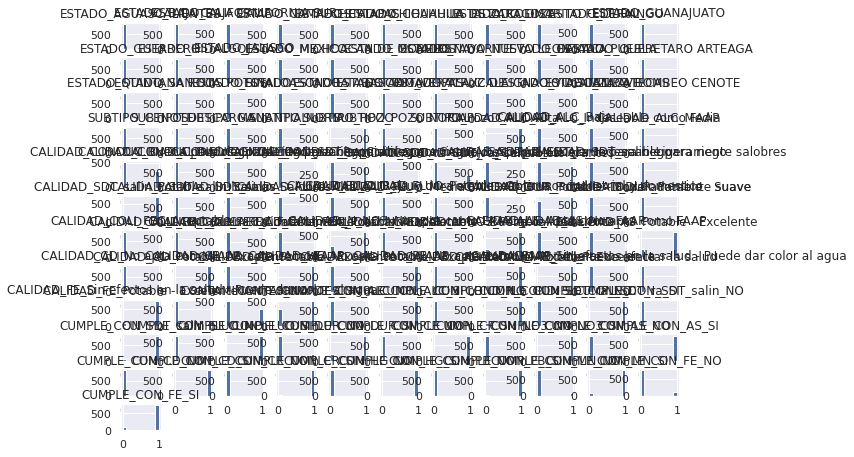

In [5]:
Xtv.hist()

In [6]:
np.random.seed(2)

X_train = Xtv 
y_train = ytv 

# Modelo Dummy
dummy_regr = DummyClassifier()
dummy_regr.fit(X_train, y_train)
predict = dummy_regr.predict(X_train)

# Errores 
accuracy = accuracy_score(y_train, predict)
precision = precision_score(y_train, predict,average='micro')
recall = recall_score(y_train, predict,average='micro')

print('accuracy: ' + str(accuracy) + '\n' + 
'precision: ' + str(precision) + '\n' + 
'recall: ' + str(recall))

accuracy: 0.4063231850117096
precision: 0.4063231850117096
recall: 0.4063231850117096


In [7]:
def mi_accuracy(datos, pred):
    accuracy = accuracy_score(datos,pred) #usando skl
    return accuracy 

def mi_precision(datos, pred):
    precision = precision_score(datos, pred,average='micro')  # usando skl
    return precision

def mi_recall(datos,pred):
    mi_recall = recall_score(datos, pred,average='micro') # usando skl
    return mi_recall

mismetricas = {
  "accuracy": make_scorer(mi_accuracy),
  "precision": make_scorer(mi_precision),
  "recall": make_scorer(mi_recall),
}

In [9]:
kfold = RepeatedKFold(n_splits=5, n_repeats=3,random_state=2)

In [10]:
X_train = Xtv 
y_train = ytv 

mi_regressor = DecisionTreeClassifier()
mi_regressor.fit(X_train, y_train)
predict = mi_regressor.predict(X_train)

resultados = list() 
resultados = cross_validate(mi_regressor, X_train, y_train, scoring=mismetricas, cv=kfold, return_train_score=True)

print('El accuracy promedio es: ' + str(resultados['test_accuracy'].mean().round(2)) + '\n' +
'El precision promedio es: ' + str(resultados['test_precision'].mean().round(2)) + '\n' +
'El recall promedio es: ' + str(resultados['test_recall'].mean().round(2)))

El accuracy promedio es: 1.0
El precision promedio es: 1.0
El recall promedio es: 1.0


In [11]:
X_train = Xtv 
y_train = ytv 

mi_regressor = RandomForestClassifier()
mi_regressor.fit(X_train, y_train)
predict = mi_regressor.predict(X_train)

resultados = list() 
resultados = cross_validate(mi_regressor, X_train, y_train, scoring=mismetricas, cv=kfold, return_train_score=True)

print('El accuracy promedio es: ' + str(resultados['test_accuracy'].mean().round(2)) + '\n' +
'El precision promedio es: ' + str(resultados['test_precision'].mean().round(2)) + '\n' +
'El recall promedio es: ' + str(resultados['test_recall'].mean().round(2)))


El accuracy promedio es: 0.99
El precision promedio es: 0.99
El recall promedio es: 0.99
